lumipy is a collection of python based functions for plotting different kinds of spectra! 🕯️

The following tutorials will help guide you in understanding the various functionalities and ways to use lumipy. PLease see docs for specifics on function parameters and return types.

In [7]:
import lumipy as lp
import matplotlib.pyplot as plt

Plotting Lorentz convolution spectra is easy an convinient with the Lorentz function! This function computes individual Lorentz curves as follows:
$$
\mathrm{L}{\left(\epsilon_i, f_i\right)} = \frac{\gamma f_i}{2\pi(\frac{\gamma^2}{4} + (\epsilon - \epsilon_i)^2)}
$$

In [9]:
# Compute the Lorentz curve for one (energy,intensity) data point

x, s = lp.lorentz(200.5, 0.3) # same as: lp.lorentz([200.5], [0.3])

print(f'energy values (x) have shape:             {x.shape}')
print(f'broadend intensity values (s) have shape: {s.shape}')

energy values (x) have shape:             (10000,)
broadend intensity values (s) have shape: (10000,)


In [10]:
# Compute the Lorentz curve for many (energy,intensity) data points

e = [200.5, 201.0, 202.0]
f = [0.3, 0.5, 0.7]

x, s = lp.lorentz(e, f)

print(f'energy values (x) have shape:             {x.shape}')
print(f'broadend intensity values (s) have shape: {s.shape}')

energy values (x) have shape:             (10000,)
broadend intensity values (s) have shape: (3, 10000)


Each row of s is the broadened intesity of the respective data point ($\epsilon_i,\; f_i$), while x gives the global energy range to all Lorentz broadened spectra. These return shapes allow for quick and simple plotting!

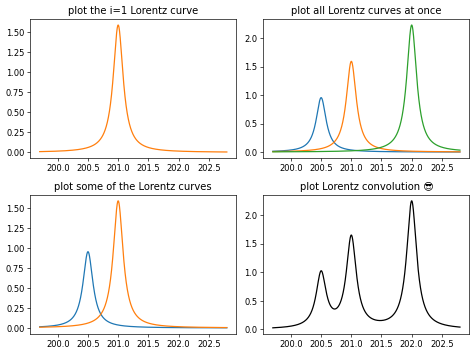

In [11]:
fig, ax = plt.subplots(2,2, figsize=(8, 6), dpi=60)

ax[0,0].set_title('plot the i=1 Lorentz curve')
ax[0,0].plot(x, s[1], c='C1')

ax[0,1].set_title('plot all Lorentz curves at once')
ax[0,1].plot(x, s.T)

ax[1,0].set_title('plot some of the Lorentz curves')
ax[1,0].plot(x, s[:2].T)

ax[1,1].set_title('plot Lorentz convolution 😎')
ax[1,1].plot(x, s.sum(axis=0), c='k')

fig.tight_layout(pad=1)
plt.show()

In [12]:
# Compute the Lorentz curve for many sets of (energy,intensity) data points

e = [[200.5, 201.0, 202.0], [202.5, 203.0, 205.0]]
f = [[0.3, 0.5, 0.7], [0.2, 0.4, 0.6]]

x, s = lp.lorentz(e, f)

print(f'energy values (x) have shape:             {x.shape}')
print(f'broadend intensity values (s) have shape: {s.shape}')

energy values (x) have shape:             (10000,)
broadend intensity values (s) have shape: (2, 3, 10000)


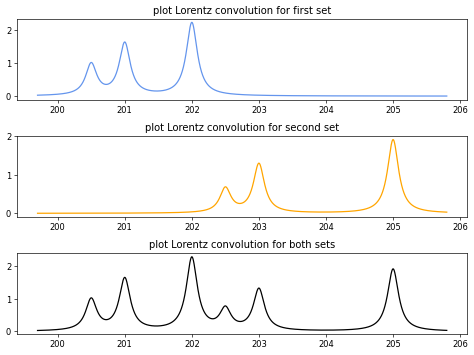

In [13]:
fig, ax = plt.subplots(3,1, figsize=(8, 6), dpi=60)

ax[0].set_title('plot Lorentz convolution for first set')
ax[0].plot(x, s[0].sum(0), c='cornflowerblue')

ax[1].set_title('plot Lorentz convolution for second set')
ax[1].plot(x, s[1].sum(0), c='orange')

ax[2].set_title('plot Lorentz convolution for both sets')
ax[2].plot(x, s.sum(axis=(0,1)), c='k')

fig.tight_layout(pad=1)
plt.show()

Building on Lorentz convolutions, the tempo function allows you to plot energy and intensity data values with a time dependance.
$$
\left[ \mathrm{L}_{t_1},\; \mathrm{L}_{t_2},\; \mathrm{L}_{t_3},\; \dots\right]
$$
Use this funciton to create time-resolved spectra!

In [ ]:
# Compute the time evolution of the Lorentz curve with lp.tempo

t = [0.0, 0.5, 1.0]
e = [200.5, 201.0, 202.0]
f = [0.3, 0.5, 0.7]

x, s = lp.tempo(t, e, f)



In [ ]:
# lumipy is offers a quick way to plot the 2D time reolved spectra with lp.plot2D

lp.plot2D(t, x, s)